# **Data Exploration and Visualisation - AutomobileExample**

**Objectives**

Assume you are new to knowledge on data discovery. You get to know that there are many **python** tools out there for Data Exploration: **Matplotlib, Seaborn, Pandas, Numpy, Plotly, etc**. 
Which one should you use? 
How to use it? 
This broad availability itself has created confusion. The objective of this session is to clear that confusion and walk you through the world of data exploration. 

You will work on a real dataset (using Google Colab)  to apply relevant analysis, mining and exploration techniques such as data cleaning, transformation, pattern exploration, Data Normality, Homoscedasticity,  Linearity, etc.

**What is Python**

Python is an interpreted, high-level, general-purpose programming language (see full introduction) on Wikipedia).

Python is not the only choice for developing AI programs, but it's the most common due to the large number of libraries which are relevant to this domain.

One of the most interesting facts about Python is that code readibility is mandatory. In particular, indentation must be used properly (don't worry: code editors help).

 ## **Colab instructions**

Colab is a cloud-based data analysis system and this link will take you to the introductory Colab notebook:
https://colab.research.google.com/notebooks/intro.ipynb
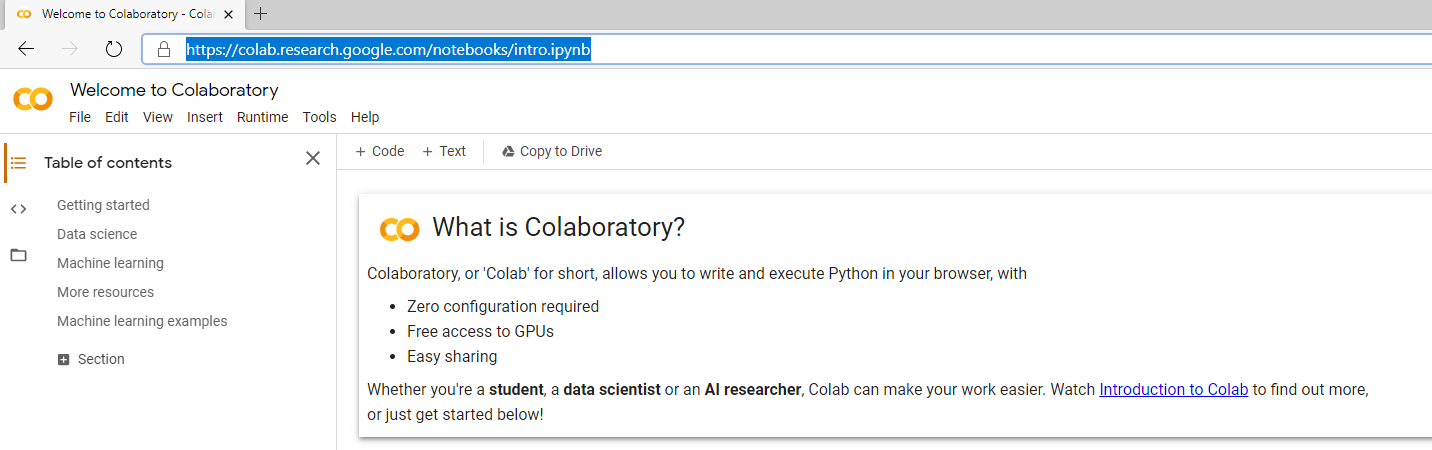


Scrolling through this notebook, you will find some simple code cells that you can execute for yourself and some links to Colab documentation.

The first task is to create a new Colab notebook by selecting it from the menu, “File > New notebook”:
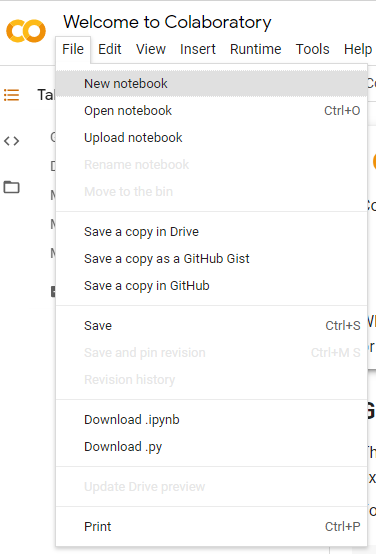

At this point, if you are not signed-in to a Google account you will be given the following prompt:
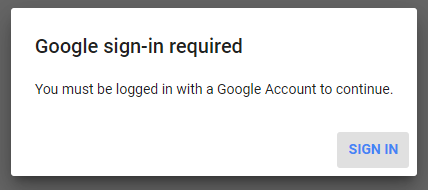

Click the sign in button and log in using the following dialogue:

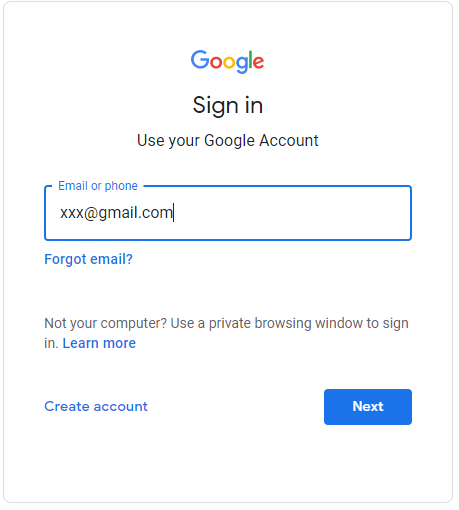

Click the “Next” button and enter your password. You should now have the following browser tab:

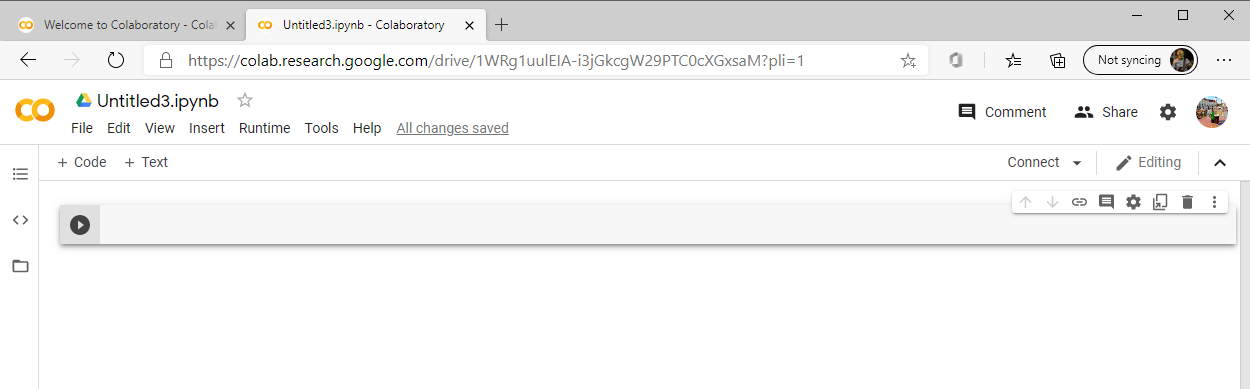

Don’t worry if the notebook has a different number in its title because we are going to rename it anyway by choosing “File > Rename notebook” and replacing “Untitled3.ipynb” with “Tutorial01.ipynb”.


*However, should you need to install python, and work from your local machine, follow the instructions below:*

* Step 1: Install Python>=3.7.5 from https://www.python.org/downloads/
download "Windows x86-64 executable installer" You may need to restart after installation
*   Step 2: Download the requirements.txt file (will be provided before the session)

*   Step3: Install Install requirements

     From command prompt (CMD in windows) or shell (mac)

     Go to your project folder (Where you have just downloaded the github files) by using "cd" to that folder then write
     pip install -r requirements.txt


*   Step 4: Start jupyter

    jupyetr will be open in you browser at http://localhost:8888/ Recommended
    
    or you can type "jupyter notebook" (without double quotations) in the command prompt (within the project folder).

*  Step 5: Lets code











### **Exploration of the Auto-MPG Dataset found at UCI Machine Learning Repository**

https://archive.ics.uci.edu/ml/datasets/auto+mpg

##### TS02 Big Data resources; Data Description, Cardinality vs Dimensionality, Data Quality, Sampling

### For this session we will use 

### **NUMPY**
https://numpy.org/doc/stable/user/absolute_beginners.html

Library for the Python programming language, adding support for large, multi-dimensional arrays and matrices

Cheat sheet will be available during the session (see Cheat sheet)

## **PANDAS (Goodbye Excel)**

https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

pandas is a software library written for the Python programming language for data manipulation and analysis.

Cheat sheet will be available during the session (see Cheat sheet)

## Seaborn and Mat
Seaborn is a statistical data visualization library.

https://seaborn.pydata.org/

https://matplotlib.org/


In [ ]:
## Importing dependencies
# https://github.com/pandas-profiling/pandas-profiling
!pip install pandas-profiling==2.8.0

import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Reading data directly from UCI
# https://archive.ics.uci.edu/ml/datasets.php
## https://archive.ics.uci.edu/ml/datasets/auto+mpg
"""
The Auto MPG sample data set is a collection of 398 automobile records from 1970 to 1982. 
It contains attributes like car name, MPG, number of cylinders, horsepower and weight. 
This is a great sample data set to explore and visualize using python.

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)
"""

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df.head()

mpg  cylinders  displacement  ... model year  origin            car name
0  15.0          8         350.0  ...         70       1   buick skylark 320
1  18.0          8         318.0  ...         70       1  plymouth satellite
2  16.0          8         304.0  ...         70       1       amc rebel sst
3  17.0          8         302.0  ...         70       1         ford torino
4  15.0          8         429.0  ...         70       1    ford galaxie 500

[5 rows x 9 columns]

#### Dimensionality and cardinality of Data

In [ ]:
df.shape
print('data has a cardinality size {}'.format(df.shape[0]) + 
      ' and dimensionality size {}'.format(df.shape[1]))

data has a cardinality size 397 and dimensionality size 9


In [ ]:
'ATTRIBUTE TYPES: INTEGER, FLOAT AND OBJECTS'
df.info()
print(df.isnull().values.any())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car name      397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB
False


In [ ]:
## Nothing seems to be missing. Think again!
## Which feature has wrong Dtype?
## Go to menti.com and instert the following code 38016233


In [ ]:
'number of distinct observations per group for each column'
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [ ]:
## Describe you data
df.describe().drop(columns=["model year", "origin"])

mpg   cylinders  displacement       weight  acceleration
count  397.000000  397.000000    397.000000   397.000000    397.000000
mean    23.528463    5.448363    193.139798  2969.080605     15.577078
std      7.820926    1.698329    104.244898   847.485218      2.755326
min      9.000000    3.000000     68.000000  1613.000000      8.000000
25%     17.500000    4.000000    104.000000  2223.000000     13.900000
50%     23.000000    4.000000    146.000000  2800.000000     15.500000
75%     29.000000    8.000000    262.000000  3609.000000     17.200000
max     46.600000    8.000000    455.000000  5140.000000     24.800000

In [ ]:
# using groupby function with aggregation 
# to get mean, min and max values of mpg and weight grouped by car name 
df.groupby('car name').agg({'mpg': ['mean', 'min', 'max'], 'weight': 
                            ['mean', 'min', 'max']})
# df[df['car name'] == 'amc ambassador brougham']

mpg              weight                
                          mean   min   max    mean     min     max
car name                                                          
amc ambassador brougham  13.00  13.0  13.0  3821.0  3821.0  3821.0
amc ambassador dpl       15.00  15.0  15.0  3850.0  3850.0  3850.0
amc ambassador sst       17.00  17.0  17.0  3672.0  3672.0  3672.0
amc concord              21.85  19.4  24.3  3106.5  3003.0  3210.0
amc concord d/l          18.10  18.1  18.1  3410.0  3410.0  3410.0
...                        ...   ...   ...     ...     ...     ...
vw dasher (diesel)       43.40  43.4  43.4  2335.0  2335.0  2335.0
vw pickup                44.00  44.0  44.0  2130.0  2130.0  2130.0
vw rabbit                35.25  29.0  41.5  2040.5  1937.0  2144.0
vw rabbit c (diesel)     44.30  44.3  44.3  2085.0  2085.0  2085.0
vw rabbit custom         31.90  31.9  31.9  1925.0  1925.0  1925.0

[305 rows x 6 columns]

In [ ]:
## Try it using other features
## Your code here




In [ ]:
# ## using custom function
# def avg_f(x):
#   return sum(x)/len(x)

# df.groupby('car name').agg({'mpg': ['mean', 'min', 'max', len, avg_f], 'weight': 
#                             ['mean', 'min', 'max']})

### **Data Cleaning**

In [ ]:
'Find the missing values'
df.isnull().sum()
# but horsepower datatype is object!

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# Detect non numeric columns
df.select_dtypes(include='object')

horsepower            car name
0        165.0   buick skylark 320
1        150.0  plymouth satellite
2        150.0       amc rebel sst
3        140.0         ford torino
4        198.0    ford galaxie 500
..         ...                 ...
392      86.00     ford mustang gl
393      52.00           vw pickup
394      84.00       dodge rampage
395      79.00         ford ranger
396      82.00          chevy s-10

[397 rows x 2 columns]

In [ ]:
'some missing numbers (?) were identified in the horsepower feature during filtering'
df.horsepower.unique()

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0', '?',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# Convert non-numeric types (e.g. strings) to a suitable numeric type
# Replace ? with nan
missing_values = ["?"]
df.horsepower = pd.to_numeric(df.horsepower.replace('?', np.nan))
# df = pd.read_csv("", na_values = missing_values)

In [ ]:
df.horsepower.unique()

array([165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,  95.,
        97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,  nan,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 130., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
'Total number of missing values in each column'
number_missing_values = df.isnull().sum()
number_missing_values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

##### Missing values can be handled in a number of ways:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

##### Fill null values with mean, median and mode
```
df['A'] = df['A'].fillna(df['A'].mean())

df['A'] = df['A'].fillna(df['A'].median())

df['A'] = df['A'].fillna(df['A'].mode())
```

##### Backward fill
```
df['A'] = df['A'].fillna(method='bfill')
```
##### Forward fill
```
df['A'] = df['A'].fillna(method='ffill')
```

In [ ]:
## Let's go with the mean
'Imputing the missing values with the mean'
# make a copy
df_mpg = df.copy()
df_mpg['horsepower'].fillna(df_mpg['horsepower'].mean(), inplace=True)

In [ ]:
## Check the null values
## Your code here (hint: use isnull().sum())


In [ ]:
'Data has both categorical and numerical/continous variables'
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
## **Find duplicate records**
df_mpg.duplicated().sum()

0

#### TS03 DATA EXPLORATION

In [ ]:
'Statistical summary of the dataset'
df_mpg.describe()

mpg   cylinders  ...  model year      origin
count  397.000000  397.000000  ...  397.000000  397.000000
mean    23.528463    5.448363  ...   76.025189    1.574307
std      7.820926    1.698329  ...    3.689922    0.802549
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.500000    4.000000  ...   73.000000    1.000000
50%     23.000000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 8 columns]

In [ ]:
## Statistical summary of mpg
df_mpg.mpg.describe()

count    397.000000
mean      23.528463
std        7.820926
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

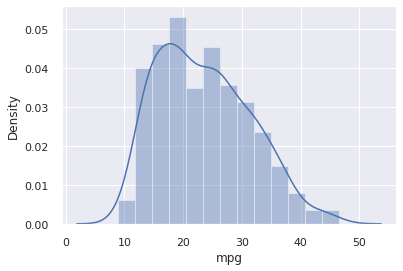

In [ ]:
## Let's look at the distribution of mpg

sns.distplot(df_mpg['mpg'])

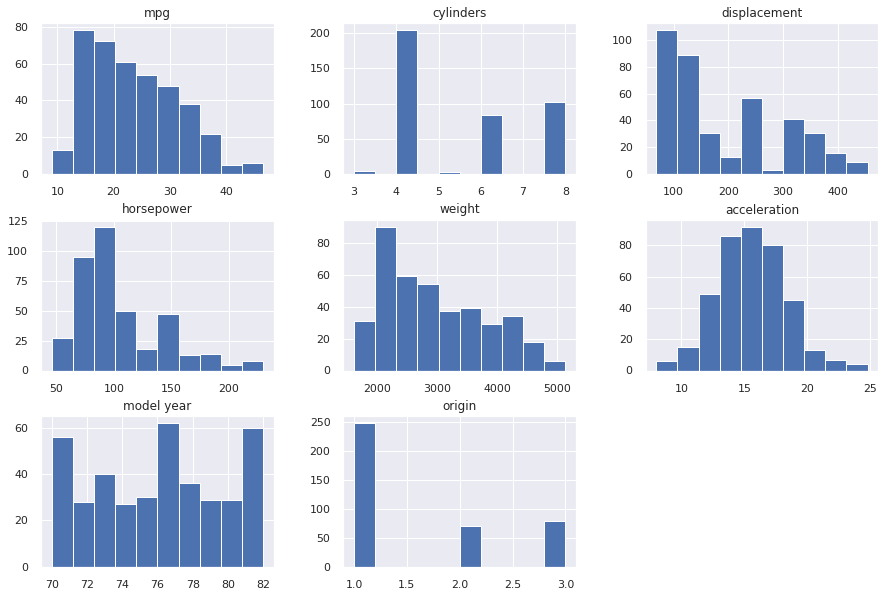

In [ ]:
'DISTRIBUTION OF all FEATURES'
'Plotting Histogram for attributes'
## https://en.wikipedia.org/wiki/Histogram

df_mpg.hist(figsize=(15,10),bins=10)
plt.show()

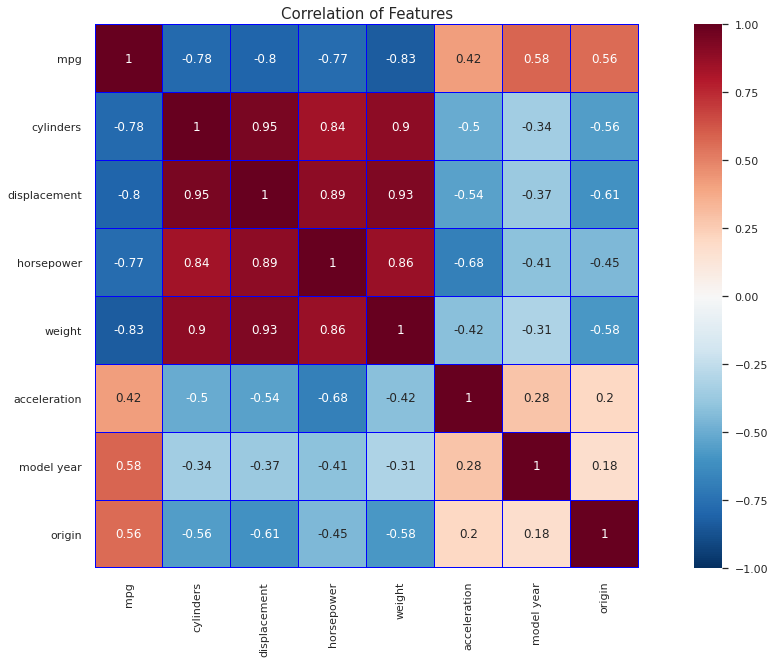

In [ ]:
#Exploratory data analysis
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,10))
plt.title('Correlation of Features', y=1.0, size=15)
sns.heatmap(df_mpg.corr(), linewidths=0.15,vmin=-1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='blue', annot=True)

'17 outliers are identified between 200 and 250'

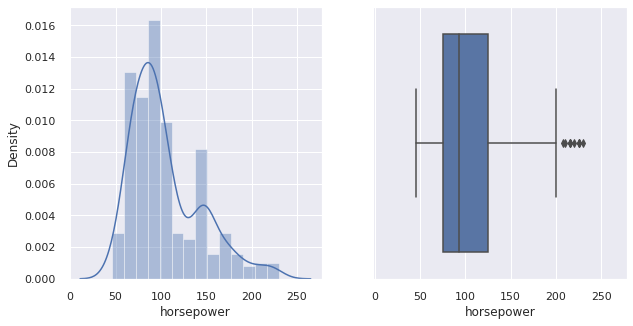

In [ ]:
# distribution plot with box plot

# https://seaborn.pydata.org/generated/seaborn.distplot.html
df_mpg =df.copy()
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['horsepower'], ax = axes[0])
sns.boxplot(df_mpg['horsepower'], ax = axes[1])
## How many outliers between values 200 and 250
'{} outliers are identified between 200 and 250'.format(sum(df_mpg['horsepower']>185))

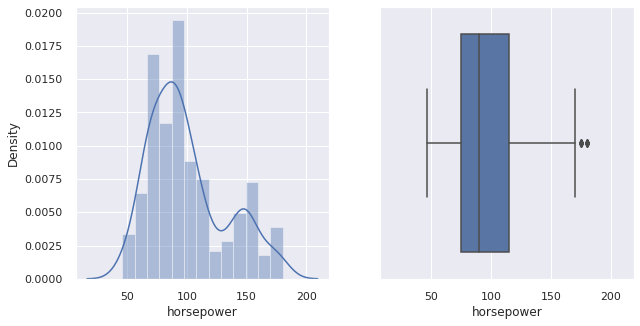

In [ ]:
# distribution plot with box plot

# https://seaborn.pydata.org/generated/seaborn.distplot.html
df_mpg =df.copy()
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg[df_mpg['horsepower']<185]['horsepower'], ax = axes[0])
sns.boxplot(df_mpg[df_mpg['horsepower']<185]['horsepower'], ax = axes[1])


'1 outliers are identified between 45 and 50'

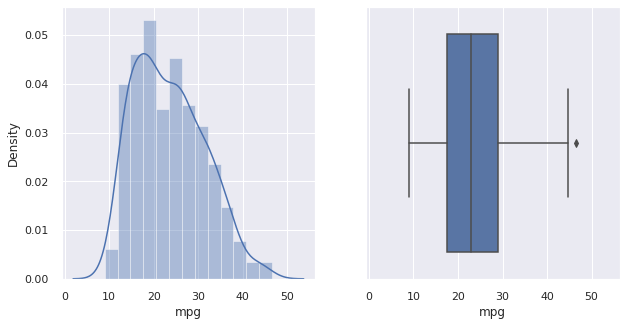

In [ ]:
# Show distribution plot with box plot of mpg
# Your code here

f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['mpg'], ax = axes[0])
sns.boxplot(df_mpg['mpg'], ax = axes[1])

## How many outliers between values 200 and 250
# Your code her
'{} outliers are identified between 45 and 50'.format(sum(df_mpg['mpg'] 
                                                          >= 45))

**Full pattern exploration**

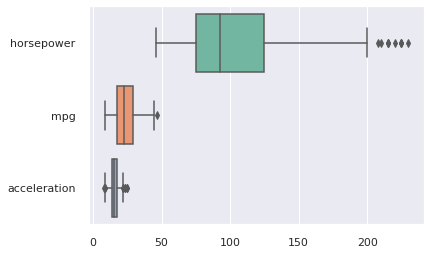

In [ ]:
#checking for outliers (more than one feature)
'MULTIVARIATE ANALYSIS'
df_ = df[['horsepower', 'mpg', 'acceleration']]
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

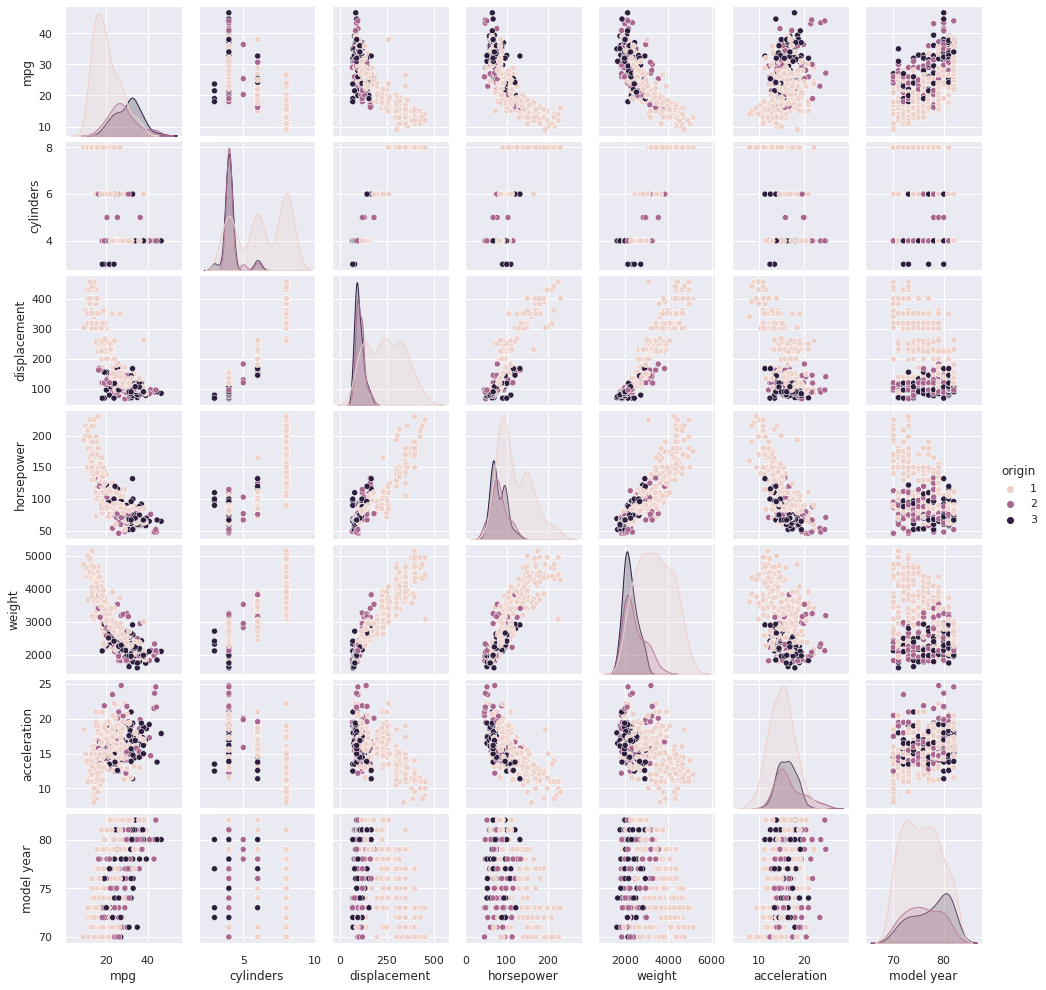

In [ ]:
#  Plot pairwise relationships
sns.set()
sns.pairplot(df, size = 2.0,hue ='origin')
plt.show()

## Understanding correlation
https://en.wikipedia.org/wiki/Correlation_and_dependence

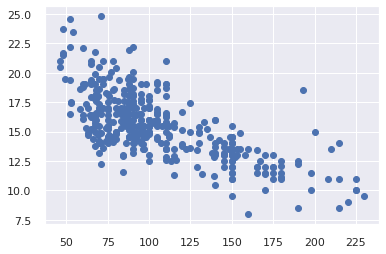

In [ ]:
'EXAMPLE OF A NEGATIVE CORRELATION'
plt.scatter(df.horsepower, df.acceleration)

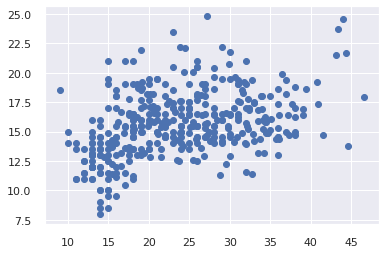

In [ ]:
'EXAMPLE OF A POSITIVE CORRELATION'
plt.scatter(df.mpg, df.acceleration)

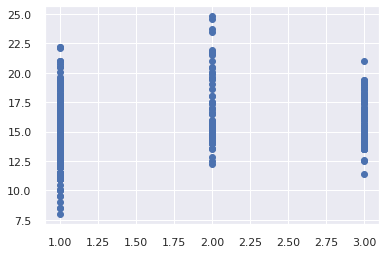

In [ ]:
'EXAMPLE OF NO CORRELATION'
plt.scatter(df.origin, df.acceleration)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


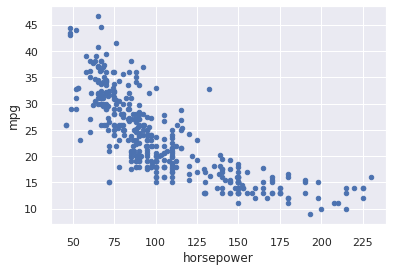

In [ ]:
df.plot(kind='scatter', x="horsepower", y='mpg')
plt.show()

### Checking data


1.   Normality (checking univariate normality)

    This is important because several statistic tests rely on this (e.g. t-statistics).
2.   Homoscedasticity
    
    Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013) ](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables. 
3.   Linearity

    The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.

  

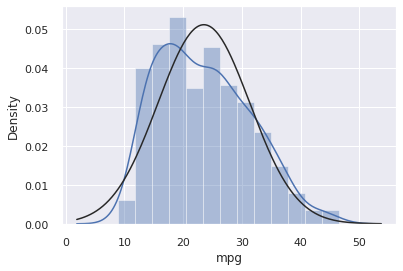

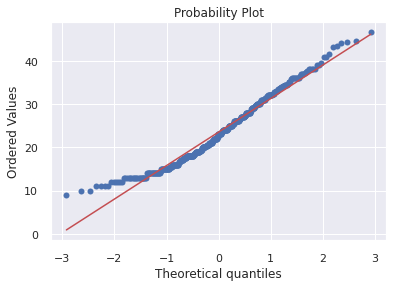

In [ ]:
## Normality

from scipy import stats
from scipy.stats import norm
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Normal probability plot 
# Your code here (test different var)
var = 'mpg'
sns.distplot(df[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)

# More about normality tests
# https://michael-fuchs-python.netlify.app/2019/09/13/check-for-normal-distribution/

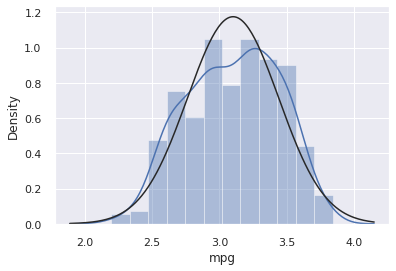

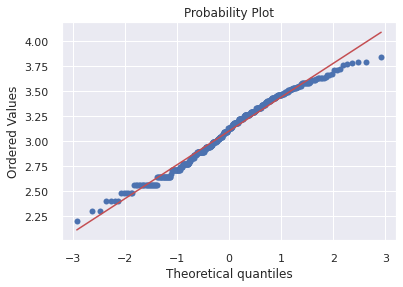

In [ ]:
# Doesn't look normal dist
# Applying log transformation ( used for positive skewness dist)
## https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-

df_log = df.copy()
df_log[var] = np.log(df_log[var])

sns.distplot(df_log[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df_log[var], plot=plt)

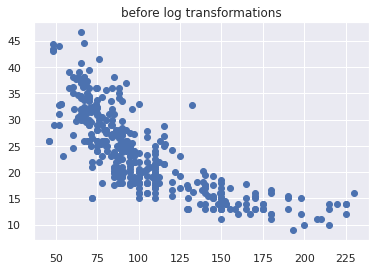

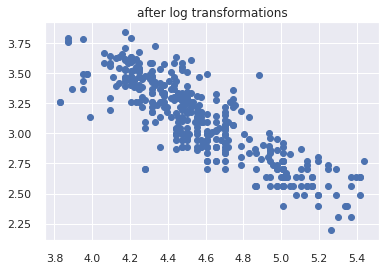

In [ ]:
## homoscedasticity
## The best approach to test homoscedasticity for two metric variables is graphically.
df_log = df.copy()
df_log['horsepower'] = np.log(df_log["horsepower"])
df_log['mpg'] = np.log(df_log['mpg'])

plt.scatter(df['horsepower'], df['mpg']);
plt.title('before log transformations')
plt.show()
plt.scatter(df_log['horsepower'], df_log['mpg']);
plt.title('after log transformations')
plt.show()

# As you can see below , the current scatter plot (after log transformation) 
# doesn't have a conic shape anymore. That's the power of normality! 
# Just by ensuring normality in some variables, we solved the homoscedasticity problem.

In [ ]:
## Try with the acceleration
## Your code here


In [ ]:
# Data passport
# https://github.com/pandas-profiling/pandas-profiling
from pandas_profiling import ProfileReport


df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Other data quality issues
## Inconsistent formats
## Features importance 
## Misleading correlation or data dependency
## Data imbalance
## https://searchenterpriseai.techtarget.com/feature/9-data-quality-issues-that-can-sideline-AI-projects
## https://www.dataversity.net/challenges-for-data-governance-and-data-quality-in-a-machine-learning-ecosystem/
